# Investigate a Dataset (*TMDB MOVIE DATA*)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project of my Data Analysis, I am investigating a TMDb movies database file which has collection of important detials of around 10000 movies, including their details of budget, revenue, release dates, profit, loss etc.

Let's take a __brief look(bl)__ at __TMDb movie database__ csv file...

In [1]:
import pandas as pd

#reading tmdb csv file and storing that to a variable
bl_tmdb = pd.read_csv('tmdb-movies.csv')

#calling out first 5 rows (excluding headers) of tmdb database
bl_tmdb.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [2]:
bl_tmdb.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

<a id='intro'></a>
### About the dataset


 - The columns `budget`, `revenue`, `budget_adj`, `revenue_adj` has not given us the currency but for this dataset we will assume that it is in dollars.
 - The vote count for each movie is not similar, for example, the movie `Mad Max : Fury Road` has `6k+` votes while `Sinister 2` has only `331 votes` (as seen above). Since the votes of the movies vary so much the `vote_average` column also is effected by it. So we cannot calculate or assume that movie with highest votes or rating was more successful since the voters of each film vary.
 

### Brainstroming Questions

Looking at this database...

 - The first question comes in my mind is which movie gained the most profit or we can also kind of say that which movie has been the people's favourite?
 - Since this is just the brief look of the database, this just shows the movies in the year 2015, but there are also other movies released in different years so the Second question comes in my mind is in which year the movies made the most profit?
 - Finally my curious mind wanted to know what are the similar characteristics of movies which have gained highest profits?
 
 

### Data Cleaning and Wrangling

Based on the questions brainstormed above, we want to know do we have all the valid values of the variables that we want to calculate and how can this data be trimmed so we can only have the columns we need. This will also make our dataset clean and easy for us to calculate what we want.

 - As you can see in this database of movies, there are lots of movies where the budget or revenue have a value of '0' which means that the values of those variables of those movies has not been recorded. Calculating the profits of these movies would lead to inappropriate results. So we need to delete these rows.
 - Also this dataset has some duplicate rows. We have to clean that too for appropriate results.
 - We will also calculate the average runtime of the movies so in case if we have a runtime of a movie '0' then we need to replace it with `NaN`.
 - The `release_date` column must be converted into date format.
 - Checking if all columns are in the desired data type, if not then we have to change it.
 - Mentioning the country currency in the desired columns.
 - Finally, we will also remove unnecessory columns such as ` 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count' and 'vote_average'.`



### Questions to be answered

__1. General questions about the dataset.__
 
   A. Which movie earns the most and least profit?
     
   B. Which movie had the greatest and least runtime?

   C. Which movie had the greatest and least budget?
 
   D. Which movie had the greatest and least revenue?

   E. What is the average runtime of all movies?
 
   F. In which year we had the most movies making profits?
 
 
__2. What are the similar characteristics does the most profitable movie have?__
        
   A. Average duration of movies.
 
   B. Average Budget.
 
   C. Average revenue.
        
   D. Average profits.
       
   E. Which director directed most films?
   
   F. Which cast has appeared the most?
        
   G. Which genre were more successful?


<a id='intro'></a>
## Data Cleaning

Before answering the above questions we need a clean dataset which has columns and rows we need for calculations.

First, lets clean up the columns. We will only keep the columns we need and remove the rest of them.

Columns to delete - `id`, `imdb_id`, `popularity`, `budget_adj`, `revenue_adj`, `homepage`, `keywords`, `overview`, `production_companies`, `vote_count` and `vote_average`.

In [3]:
#importing all the nescessory packages
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#this variable will store the database of tmdb movies into a dataframe
movie_data = pd.read_csv('tmdb-movies.csv')

In [4]:
movie_data.shape

(10866, 21)

In [5]:
#In number of rows, header count also included. So to remove that,
rows, col = movie_data.shape
print('We have {} total entries of movies and {} columns.'.format(rows-1, col))

We have 10865 total entries of movies and 21 columns.


In [6]:
#delete the columns which are not needed
del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

 
#deleting the columns from the database
movie_data = movie_data.drop(del_col, 1)
movie_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


Difference between the original dataset and the deleted columns dataset is seen clearly. Now we can perform cleaning to this dataset.


Now remove the duplicate rows

In [7]:
#will drop duplicate rows but will keep the first one
movie_data.drop_duplicates(keep = 'first', inplace = True)

rows, col = movie_data.shape
print('We now have {} total entries of movies and {} columns.'.format(rows-1, col))

We now have 10864 total entries of movies and 10 columns.


Analysing the output there is one duplicate value.

Now check which movie have the badget value as '0' and then delete those movie list from the dataset.

In [8]:
#column names that needs to be checked for value '0'
check_row = ['budget', 'revenue']

#this will replace the value of '0' to NaN of columns given in the list
movie_data[check_row] = movie_data[check_row].replace(0, np.NaN)

#now we will drop any row which has NaN values in any of the column of the list (check_row) 
movie_data.dropna(subset = check_row, inplace = True)

rows, col = movie_data.shape
print('After cleaning, we now have only {} entries of movies.'.format(rows-1))

After cleaning, we now have only 3853 entries of movies.


In [9]:
movie_data.shape

(3854, 10)

Not considering the header row, now rows reduced from 10865 to 3853 and columns reduced to 10. So now we have cleaned the dataset lets move to the wrangling phase.

<a id='wrangling'></a>
## Data Wrangling

Now first lets check if we have any movie with a runtime value of 0. If we have any, we will replace with NaN.

In [10]:
#replacing 0 with NaN of runtime column of the dataframe
movie_data['runtime'] = movie_data['runtime'].replace(0, np.NaN)

In [11]:
type(movie_data['release_date'][0])

str

Now we need to convert the 'release_date' column to date format

In [12]:
#calling the column which need to be formatted in datetime and storing those values in them
movie_data.release_date = pd.to_datetime(movie_data['release_date'])

#showing the dataset
movie_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


The 'release_date' column has been changed to date format. (year-month-day)

__Lets check if all the columns are in the format that we want for our calculations.__


In [13]:
#check datatypes of all the columns
movie_data.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

For 'budget' and 'revenue' columns, datatype is 'float'. Lets change it to 'int' datatype.

In [ ]:
#applymap function changes the columns data type to the type 'argument' we pass
change_coltype = ['budget', 'revenue']

movie_data[change_coltype] = movie_data[change_coltype].applymap(np.int64)
#shwoing the datatypes of all columns
movie_data.dtypes

Now all columns datatype are in the format which we needed.

__Since the values in the column 'budget' and 'revenue' shows us in Currency of US (as assumed earlier), lets change the name of these columns for convenience.__


In [14]:
#rename function renames the columns, the key as being the old name and its value new name of it in form of dictionary.
movie_data.rename(columns = {'budget' : 'budget_(in_US-Dollars)', 'revenue' : 'revenue_(in_US-Dollars)'}, inplace = True)
movie_data.head()

,budget_(in_US-Dollars),revenue_(in_US-Dollars),original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


Now the dataset is ready. Lets start to investigate it.

<a id='eda'></a>
## Exploratory Data Analysis

Before answering the questions, lets figure out the profits of each movie.

In [15]:
#assign a new column for profit values of each movie

#To calculate profit of each movie, we need to substract the budget from the revenue of each movie
movie_data.insert(2, 'profit_(in_US_Dollars)', movie_data['revenue_(in_US-Dollars)'] - movie_data['budget_(in_US-Dollars)'])

#for convenience, change the data type to int
movie_data['profit_(in_US_Dollars)'] = movie_data['profit_(in_US_Dollars)'].apply(np.int64)

#showing the dataset
movie_data.head()

,budget_(in_US-Dollars),revenue_(in_US-Dollars),profit_(in_US_Dollars),original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


__Now lets start with answering the questions.__


   ### Q1] 1A. Which movie earns the most and least profit?

In [16]:
#Let's define a function which calculates lowest and highest values of columns
#taking column name as arguments

def highest_lowest(column_name):
    
    #highest
    #taking the index value of the highest number in profit column
    highest_id = movie_data[column_name].idxmax()
    #calling by index number,storing that row info to a variable
    highest_details = pd.DataFrame(movie_data.loc[highest_id])
    
    #lowest
    #same processing as above
    lowest_id = movie_data[column_name].idxmin()
    lowest_details = pd.DataFrame(movie_data.loc[lowest_id])
    
    #concatenating two dataframes
    two_in_one_data = pd.concat([highest_details, lowest_details], axis = 1)
    
    return two_in_one_data

#calling the function and passing the argument
highest_lowest('profit_(in_US_Dollars)')

,1386,2244
budget_(in_US-Dollars),2.37e+08,4.25e+08
revenue_(in_US-Dollars),2.78151e+09,1.10876e+07
profit_(in_US_Dollars),2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


The first column with the index number 386 gives the highest profit made by a movie and second column with the number 2244 gives the highest loss made by a movie in this dataset.

The movie Directed by _James Cameron_, _Avatar_ film has the highest profit in all, making over 2.5Billion dollor in profit in this dataset. And the most in loss movie in this dataset is _The Warriors Way_. Going in loss by more than 400M dollor was directed by _Singmoo Lee_.

Let's continue with our investigation! It's fun!


 ### Q1] 1B. Which movie had the greatest and least runtime?

In [17]:
#as our calculations seems to be same, lets call the function by passing desired argument

highest_lowest('runtime')

,2107,5162
budget_(in_US-Dollars),1.8e+07,10
revenue_(in_US-Dollars),871279,5
profit_(in_US_Dollars),-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


The first column shows the runtime of the highest and second the lowest with column names as the index number.

I have never heard a runtime of a movie so long, yes we would in old times, but in the 21st century, no! Runtime of 338 min, that's approx 3.5 hrs! So _Carlos_ movie has the highest runtime.

The name of the movie with shortest runtime is _Kid's Story_, runtime of just 15 min!

As you see both movies have one thing in common, __negative profits!__ The Kid's Story having a budget of 10 dollars and revenue 5 just doesn't seem right to me. It might be but i have never heard or seen a movie with such a short budget. But this what our dataset shows. Okay now let's move forward!



### Q1] 1C. Which movie had the greatest and least budget?

In [18]:
#as our calculations seems to be same as previous one for different column, lets call the function by passing desired argument

highest_lowest('budget_(in_US-Dollars)')

,2244,2618
budget_(in_US-Dollars),4.25e+08,1
revenue_(in_US-Dollars),1.10876e+07,100
profit_(in_US_Dollars),-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


We can see that _The Warriors Way_ had the highest budget of all movies in the dataset of about 425million dollor. This same movie also had the highest loss.

And the least budget of all, the _Lost & Found_ movie of 1dollor has made me thinking how can a movie with 95 min of runtime managed with such low budget! Also making revenue of 100dollor and earning a profit 99dollor, this may be a local movie release. Because it's kind of impossible to have such low budget and earning low revenues if it has released internationally.

Now lets look at the revenue side of the movies...!



### Q1] 1D. Which movie had the greatest and least revenue?

In [19]:
#again, we will call our function! 
highest_lowest('revenue_(in_US-Dollars)')

,1386,5067
budget_(in_US-Dollars),2.37e+08,6e+06
revenue_(in_US-Dollars),2.78151e+09,2
profit_(in_US_Dollars),2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


Its again! _Avatar_ movie also earning the most profit movie has made most revenue too!

Having lowest revenue of 2dollor, _Shattered Glass_ movie seems like couldn't sell much tickets.

Let's keep exploring!

### Q1] 1E. What is the average runtime of all movies?

In [23]:
#giving a function which calculates average of a particular column
def average_func(column_name):
    
    return movie_data[column_name].mean()

#calling function to show the mean
average_func('runtime')

109.22029060716139

The average runtime of all movies in this dataset is 109 mins approx. We want to get a deeper look and understanding of runtime of all movies so Let's plot it. 

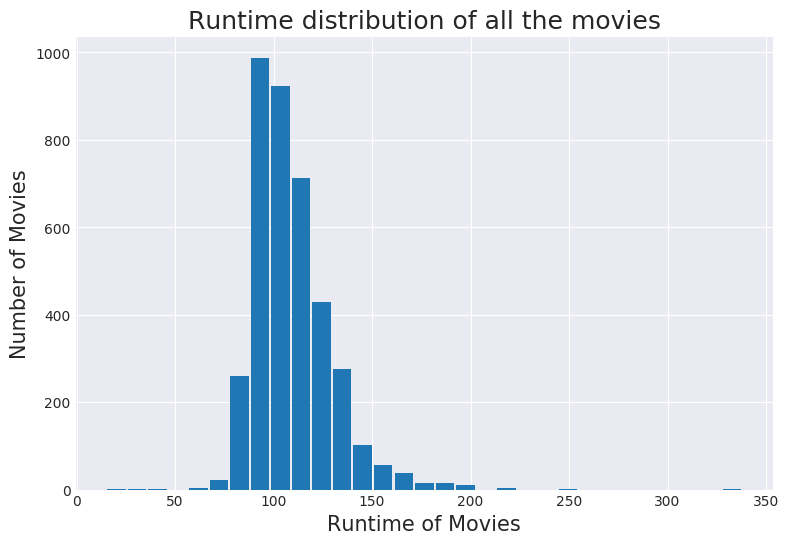

In [24]:
#plotting a histogram of runtime of movies

#style to background plot
sns.set_style('darkgrid')

#changing the label size, this will change the size of all plots that we plot from now!
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

#giving the figure size(width, height)
plt.figure(figsize=(9,6), dpi = 100)
#x-axis label name
plt.xlabel('Runtime of Movies', fontsize = 15)
#y-axis label name
plt.ylabel('Number of Movies', fontsize=15)
#title of the graph
plt.title('Runtime distribution of all the movies', fontsize=18)

#giving a histogram plot
plt.hist(movie_data['runtime'], rwidth = 0.9, bins =31)
#displays the plot
plt.show()

The above graph shows us that how many movies lie between the time interval. For example, as you can see the tallest bar here is time interval between 85-100 min(approx) and around 1000 movies out of 3855 movies have the runtime between these time intervals. The distribution of this graph is skewed right!

__Let's dig deep and figure out the outliers of this distribution.__


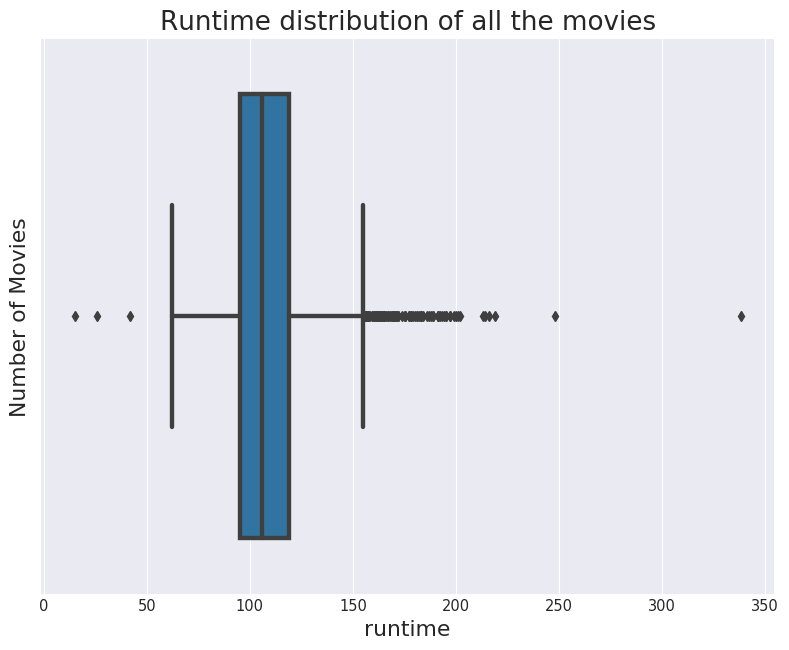

In [25]:
#giving two plots, thr first is the box plot, second is plots of runtime for movies
#giving figure size
plt.figure(figsize=(9,7), dpi = 105)
#x-axis label name
plt.xlabel('Runtime of Movies', fontsize = 15)
#y-axis label name
plt.ylabel('Number of Movies', fontsize=15)
#title of the graph
plt.title('Runtime distribution of all the movies', fontsize=18)

#using seaborn to plot
#plotting box plot
sns.boxplot(movie_data['runtime'], linewidth = 3)
#showing the plot
plt.show()

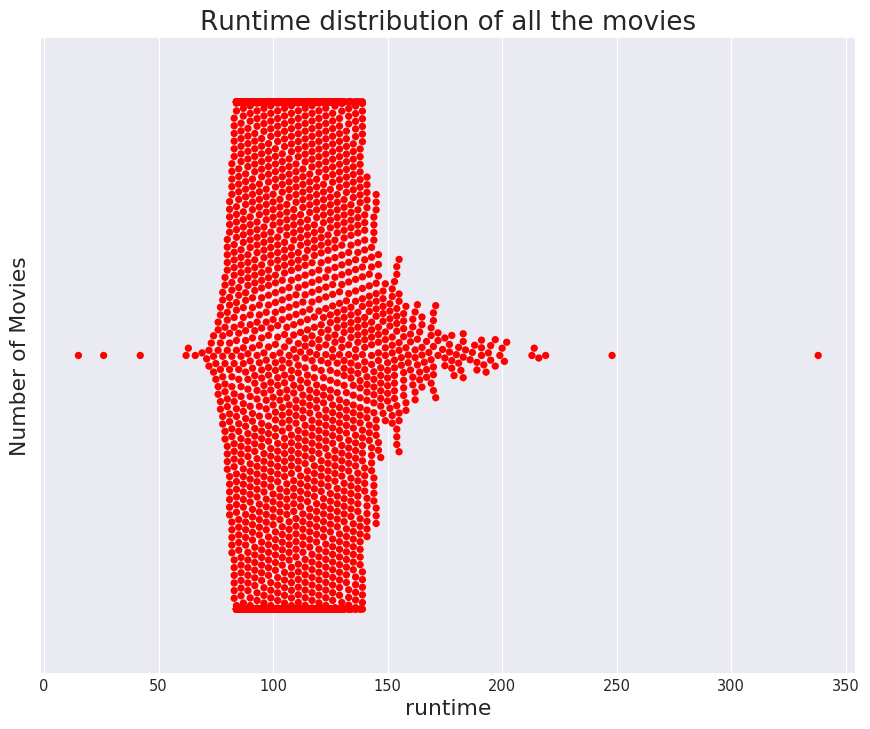

In [26]:
#plots the data points of runtime of movies

#giving figure size
plt.figure(figsize=(10,8), dpi = 105)
#x-axis label name
plt.xlabel('Runtime of Movies', fontsize = 15)
#y-axis label name
plt.ylabel('Number of Movies', fontsize=15)
#title of the graph
plt.title('Runtime distribution of all the movies', fontsize=18)

sns.swarmplot(movie_data['runtime'], color = 'red')
plt.show()

In [27]:
#getting specific runtime points at x positions
movie_data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

Both visualizations above shows us the overall distribution of runtime of movies by plotting the points where they lie in the ditribution and how many movies percent of movies lie below the runtime.

What's amazing about box-plot is that it gives us an overall idea of how spread the ditribution in our case the runtime of movies are. First of all what we get from this visualization is how many outliers we have, the min and max points, the median and IQR.

As we already saw in our previous calculations of least and highest runtime, this is the appropriate visualization in the comparison of other movies runtime. By looking at the box-plot we don't get the exact values, for example you can guess that the median is will around 100-110 min but by giving the describe function above we get the exact values.

So by looking at both, visualiztions and calculations, we can say that..

  - There are 25% of movies having a runtime of less than `95 min`
  - There are 50% of movies having a runtime of less than `106 min`. This is also the median of runtimes.
  - There are 75% of movies having a runtime of less than `119 min`
  - 50% of movies have a runtime of between 95 min and `119 min`. This is also our IQR.

As we can see there are more movies after the 3rd quartile range than the 1st. This makes the mean of the runtime pull towards the right or increases it.

Now lets answer our next question!



### Q1] 1F. In which year we had the most movies making profits?

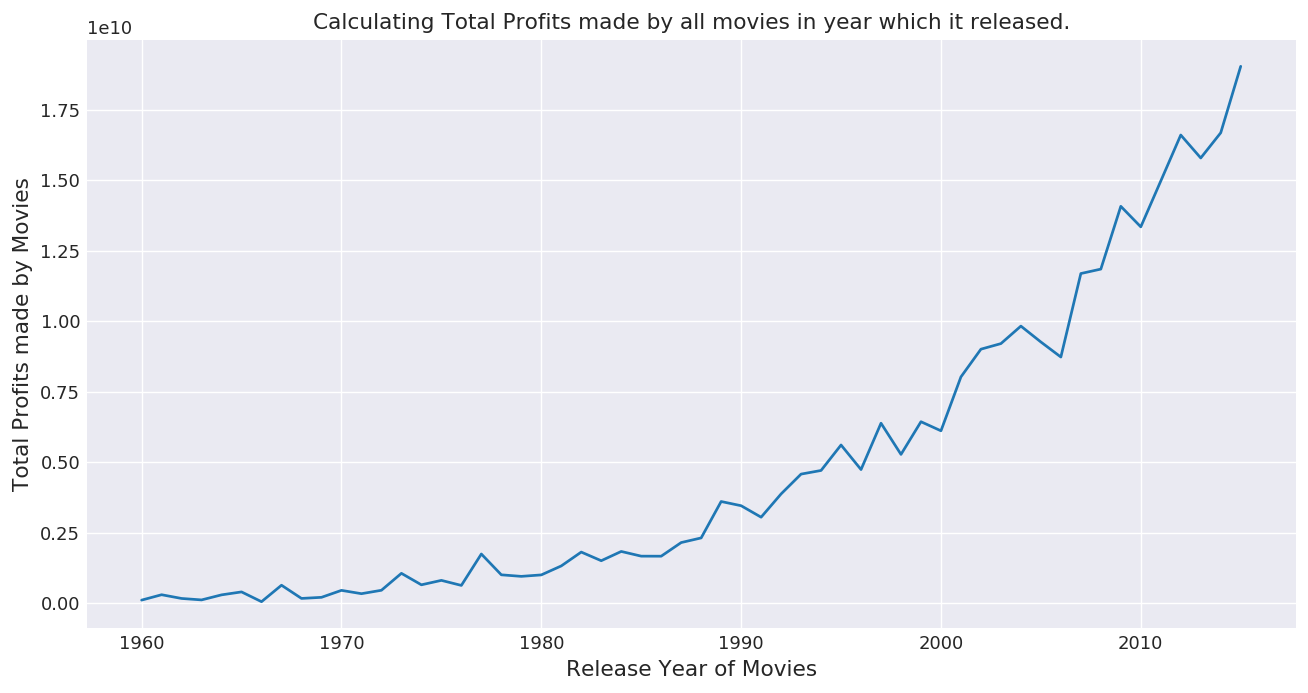

In [28]:
#Line plot used for this

#the groupby function below collects all the movies for that year and then the profits of all those movies for that years is been added
#and storing all this in variable
profits_each_year = movie_data.groupby('release_year')['profit_(in_US_Dollars)'].sum()

#giving the figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#labeling x-axis
plt.xlabel('Release Year of Movies', fontsize = 12)
#labeling y-axis
plt.ylabel('Total Profits made by Movies', fontsize = 12)
#title of a the plot
plt.title('Calculating Total Profits made by all movies in year which it released.')

#plotting what needs to be plotted
plt.plot(profits_each_year)

#showing the plot
plt.show()

Before i explain lets understand what the y axis shows us. Each values in the y-axis is been multiplied to '1e10' (as shown above the plot). Since the profits of movies are high, having 9+ digits, cannot fit the axis. So for example at the year 2010, the y-aixs value is around 1.35, which means that the profit at that year made by al movies released in that year is 1.35x1e10 =  13500000000 which is 13.5 billion dollars.

The year 2015, shows us the highest peak, having the highest profit than in any year, of more than 18 billion dollars. This graph doesn't exactly prove us that every year pass by, the profits of movies will increase but when we see in terms of decades it does show significant uprise in profits. 
At the year 2000, profits were around 8 biilion dollars, but in just 15 years it increased by 10+ biilion dollars. Last 15 years had a significant rise in profits compared to any other decades as we can see in the graph.

This dataset also doesn't show all the movies that has been released in each year. If it would the graph might would show some different trend.

Not every year had same amount of movies released, the year 2015 had the most movie releases than in any other year. The more old the movies, the more less releases at that year (atleast this is what the dataset shows us).


For convenience, i have shown which year had the most profit. Also we will take a look at the profits of each year with exact figures.


In [29]:
#this answers our question
#shows which year made the highest profit
profits_each_year.idxmax()

2015

In [30]:
#storing the values in the the form of DataFrame just to get a clean and better visual output
profits_each_year = pd.DataFrame(profits_each_year)
#printing out
profits_each_year.tail()

,profit_(in_US_Dollars)
release_year,
2011,14966694704
2012,16596845507
2013,15782743325
2014,16676201357
2015,19032145273


Highest profit is made in the year 2015 that is about 19 billion dollors.

Now we are done with exploring the dataset given. Lets start to know still deeper.

### Q2] 2A. Average _runtime_ of movies

Before answering this question, we need to first clean the dataset so we only have the data of movies that made profit not loss. Also we need movies not only who just made profit by some dollars but we need movies who made significant profits and then analyzing similar characteristics of it.

Let's take only the movies who made profits of 50M dollars or more.

In [31]:
#assinging new dataframe which holds values only of movies having profit $40M or more
profit_movie_data = movie_data[movie_data['profit_(in_US_Dollars)'] >= 40000000]

#reindexing new dataframe
profit_movie_data.index = range(len(profit_movie_data))
#will initialize dataframe from 1 instead of 0
profit_movie_data.index = profit_movie_data.index + 1

#showing the dataset
profit_movie_data.head()

,budget_(in_US-Dollars),revenue_(in_US-Dollars),profit_(in_US_Dollars),original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000.0,1.513529e+09,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000.0,3.784364e+08,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000.0,2.952382e+08,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
4,200000000.0,2.068178e+09,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
5,190000000.0,1.506249e+09,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [32]:
#number of rows of a dataframe
len(profit_movie_data)

1493

Now we have the appropriate data to work on. From 3855 rows to 1493 rows, means more than 2000+ movies approx made profits less than 40Million dollor.

Let's analyze the data now!

In [33]:
#giving a new average function since we have a different dataset
def prof_avg_fuc(column_name):
    return profit_movie_data[column_name].mean()

#mean of runtime
prof_avg_fuc('runtime')

113.19624916275954

So average runtime of movies made more profit is 113.19624 which is much near to tyhe runtime of all the movies which made profit less that 40 million dollor i.e, 109.2.


### Q2] 2B. Average _Budget_ of movies

In [34]:
#calling the function
prof_avg_fuc('budget_(in_US-Dollars)')

57308877.083054252

Average Budget of movies which earned the profit >40million dollor is around 57million dollor.


### Q2] 2C. Average _Revenue_ of movies

In [35]:
#calling the function
prof_avg_fuc('revenue_(in_US-Dollars)')

236306323.37374413

Average Revenue of movies which earned the profit >40million dollor is around 236million dollor.


### Q2] 2D. Average _Profit_ of movies

In [36]:
#calling the function
prof_avg_fuc('profit_(in_US_Dollars)')

178997446.29068989

Average Profit of movies which earned the profit >40million dollor is around 178million dollor.


### Q2] 2E. Which directer directed most films?

In [37]:
#function which will take any column as argument from which data is need to be extracted and keep track of count
def extract_data(column_name):
    #will take a column, and separate the string by '|'
    all_data = profit_movie_data[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count

In [38]:
#this will variable will store the return value from a function
director_count = extract_data('director')
#shwoing top 5 values
director_count.head()

Steven Spielberg    24
Clint Eastwood      15
Robert Zemeckis     13
Ridley Scott        12
Tim Burton          12
dtype: int64

OMG!! 'Steven Spielberg' takes the crown! Directing 24 movies over 50Million dollor in profit. Also the other directors following along the list such as 'Clint Eastwood', 'Robert Zemeckis', 'Ridley Scott', 'Tim Burton' etc prove to be really great directors.

Let's go for the next question!



### Q2] 2F. Which cast has appeared most?

In [39]:
#this will variable will store the return value from a function
cast_count = extract_data('cast')
#shwoing top 5 values
cast_count.head()

Tom Cruise      27
Tom Hanks       26
Brad Pitt       25
Cameron Diaz    22
Bruce Willis    21
dtype: int64

It's awesome.'Tome Cruise' takes the crown for appearing the most in movies profiting more than 50Million dollors. Directors hiring these actors will have higher probability of making huge profits. Famous actors such as 'Tom Cruise', 'Brad Pitt', 'Tom Hanks', etc have huge fan following, making the audience attract to the movie.

Let's move on to next question.


### Q2] 2G. Which genre were more successful?

In [40]:
#this will variable will store the return value from a function
genre_count = extract_data('genres')
#shwoing top 5 values
genre_count.head()

Drama        554
Comedy       542
Action       505
Thriller     454
Adventure    402
dtype: int64

Lets visualize this with a plot.

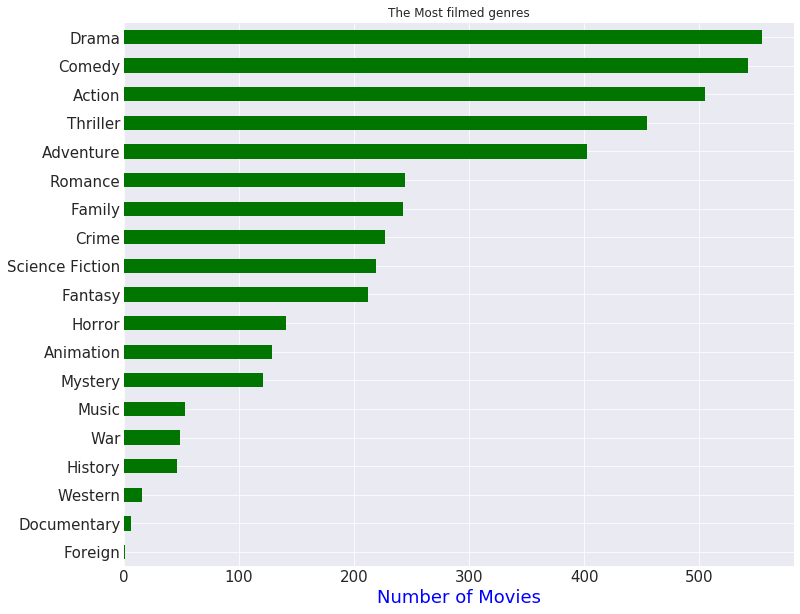

In [41]:
#since our count is in descending order and graph plot points from bottom to top, our graph will be in ascending order form top to bottom
#hence lets give the series in ascending order
genre_count.sort_values(ascending = True, inplace = True)

#initializing plot
ax = genre_count.plot.barh(color = '#007500', fontsize = 15)

#giving a title
ax.set(title = 'The Most filmed genres')

#x-label
ax.set_xlabel('Number of Movies', color = 'b', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

`Drama` takes the first place, about 554 movies have genres drama which make 50Million dollor in profit. In comparison, even `Comedy`, `Action`, `Adventure` and `Thriller` really play the role. These five genres have more number of movies than rest of the genres as shown by visualization. 

<a id='conclusions'></a>
## Conclusions

   From the above analysis, the following can be concluded as the criterias that need to be met in order to create a successful movie.
   
1. The genre of the movie should be one of the these: Drama, Comedy, Action, Thriller or Adventure.
2. Cast should include one or more of, Tom Crusie, Brad Pitt, Tom Hanks, Sylvester Stallone or Cameron Diaz.
3. Director must be one or more of, Steven Spielberg, Robert Zemeckis, Clint Eastwood, Tim Burton or Ridley Scott.
4. Production company must be one or more of, Universal Pictures, Warner Bros., Paramount Pictures, Twentieth Century Fox Film Corporation or Columbia Pictures.
5. The budget of the movie must be around 60 million dollor.
6. The runtime of the movie must be close to 2 hours.
    
    The revenue should be around 230 million dollor if all of the above criterias are met.
  
  
## Limitations

    
1. The above conclusion is not a 100% formula to success as it only takes into considerations movies that have made a sizeable profit (50 million dollors). Some movies may not have such a huge target as they canot get huge investments so they settle for a much lower profit.
2. Also, the budget and revenue columns did not have a currency specified so there may be some differences due to fluctuating exchange rates. Different countries may also have different rules and regulations they have to follow which may restrict them from artistiic freedom.
3. Rows with NaN values were dropped, hence a lot of key data might have been lost in the process.
4. There are a lot of crew members apart from the director, cast and the production companies who help in creating a movie like writers, screenplay writers, editors, etc. but there was no data to analyse those aspects.


 And that's my conclusion!



## Submitting your Project 

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0